In [1]:
#Does your object column contain mixed data types? 
#Use df.col.apply(type).value_counts() to check!
import pandas as pd

In [2]:
df = pd.DataFrame({'Customer': ['A', 'B', 'C', 'D'], 
                   'Sales($)': [10, 10.5, 6, 60.4]})

In [3]:
df

,Customer,Sales($)
0,A,10.0
1,B,10.5
2,C,6.0
3,D,60.4


In [4]:
df['Sales($)'].apply(type).value_counts()

<class 'float'>    4
Name: Sales($), dtype: int64

In [6]:
df

,Customer,Sales($)
0,A,10.0
1,B,10.5
2,C,6.0
3,D,60.4


In [7]:
df.sort_values('Sales($)')

,Customer,Sales($)
2,C,6.0
0,A,10.0
1,B,10.5
3,D,60.4


In [ ]:
df[df['Sales($)'] > 10] #comparison operators also work logically

In [9]:
df

,Customer,Sales($)
0,A,10.0
1,B,10.5
2,C,6.0
3,D,60.4


In [8]:
df['Sales($)'].to_dict()

{0: 10.0, 1: 10.5, 2: 6.0, 3: 60.4}

In [10]:
#Three useful ways to convert one set of values to another:
people = pd.DataFrame({'gender': ['male', 'female','male', 'female'],
                      'color': ['red', 'green', 'yellow', 'black'],
                      'age': [25,40,10,50]})
people

,gender,color,age
0,male,red,25
1,female,green,40
2,male,yellow,10
3,female,black,50


In [15]:
#1. map() using a dictionary

people['gender letter'] = people.gender.map({'male': 'M', 'female': 'F'})

#2. factorize() to encode each value as an integer

people['color number'] = people.color.factorize()[0]

#3. comparison statement to return boolean values

people['Right to Vote'] = people.age >= 18


In [16]:
people

,gender,color,age,gender letter,color number,Right to Vote
0,male,red,25,M,0,True
1,female,green,40,F,1,True
2,male,yellow,10,M,2,False
3,female,black,50,F,3,True


In [ ]:
#Need to apply the same mapping to multiple columns at once? 
#Use "applymap" (DataFrame method) with "get" (dictionary method)
people

In [ ]:
#mapping = {'male':'M', 'female':'F'}
cols = ['gender']
#people[cols] = people[cols].applymap(mapping.get)
#people

people.applymap(lambda x:len(str(x)))

In [20]:
#Need to create a single datetime column from multiple columns? 
#use to_datetime() 📆

df1 = pd.DataFrame([[31,12,2020,'New Year Eve'],
                  [1,5,2020, 'Workers Day'],
                  [26,12,2020, 'Boxing Day']],
                  columns = ['Day', 'Month', 'Year', 'Holiday'])
df1


,Day,Month,Year,Holiday
0,31,12,2020,New Year Eve
1,1,5,2020,Workers Day
2,26,12,2020,Boxing Day


make a single datetime column with to_datetime( )


In [21]:
df1['Date'] = pd.to_datetime(df1[['Day', 'Month', 'Year']])
df1

,Day,Month,Year,Holiday,Date
0,31,12,2020,New Year Eve,2020-12-31
1,1,5,2020,Workers Day,2020-05-01
2,26,12,2020,Boxing Day,2020-12-26


In [22]:
df1.dtypes

Day                 int64
Month               int64
Year                int64
Holiday            object
Date       datetime64[ns]
dtype: object

In [31]:
import pandas as pd

df = pd.DataFrame({'A': [2,3,4], 'B':[(1,2,3), [2,3,4], [6,8,9]]})

In [32]:
df

,A,B
0,2,"(1, 2, 3)"
1,3,"[2, 3, 4]"
2,4,"[6, 8, 9]"


In [33]:
df.dtypes

A     int64
B    object
dtype: object

In [34]:
#Expand Column B into a DataFrame by using apply() and pass the Series constructor.

df.B.apply(pd.Series)

,0,1,2
0,1,2,3
1,2,3,4
2,6,8,9


In [43]:
#Do you have a Dataframe containing lists of items? 
df2 = pd.DataFrame({'food': ['rice', 'beans', 'yam'],
                   'ingredients': [['curry', 'thyme', 'garlic'], ['chicken', 'beef'], 
                                  ['tomatoes', 'temeric']]},
                  index = ['1', '2', '3'])
df2

,food,ingredients
1,rice,"[curry, thyme, garlic]"
2,beans,"[chicken, beef]"
3,yam,"[tomatoes, temeric]"


In [44]:
#"explode" creates the rows (new in pandas 0.25)
#Create one row for each item using the "explode" method 
df2.explode('ingredients')

,food,ingredients
1,rice,curry
1,rice,thyme
1,rice,garlic
2,beans,chicken
2,beans,beef
3,yam,tomatoes
3,yam,temeric


In [37]:
#Do you have a dataframe with comma-separated items? Create one row for each item:
#"df.col.str.split()" splits strings around given seperator/delimiter
df3 = pd.DataFrame({'food': ['rice', 'beans', 'yam'],
                   'ingredients': ['curry,thyme, garlic', 'chicken,beef,onion', 
                                  'tomatoes,temeric']},
                  index = ['1', '2', '3'])

In [38]:
df3

,food,ingredients
1,rice,"curry,thyme, garlic"
2,beans,"chicken,beef,onion"
3,yam,"tomatoes,temeric"


In [39]:
#create one row for each item
df3.assign(ingredients = df3.ingredients.str.split(',')).explode('ingredients')

,food,ingredients
1,rice,curry
1,rice,thyme
1,rice,garlic
2,beans,chicken
2,beans,beef
2,beans,onion
3,yam,tomatoes
3,yam,temeric


In [51]:
weather = pd.DataFrame({'tempC': [24.5,35.2,16.7]}, index = ['Lagos', 'Ibadan', 'Kano'])

In [52]:
weather

,tempC
Lagos,24.5
Ibadan,35.2
Kano,16.7


In [53]:
#Create columns for the cities in F and K units.

weather.assign(tempK = lambda x: x['tempC']*2, tempF = lambda x: x['tempK']/12)

,tempC,tempK,tempF
Lagos,24.5,49.0,4.083333
Ibadan,35.2,70.4,5.866667
Kano,16.7,33.4,2.783333


In [ ]:
#💥 "explode" takes a list of items and creates one row for each item (new in pandas 0.25)

#You can also do the reverse! See example

df2

In [ ]:
df2.explode('ingredients')

In [ ]:
df2.ingredients= df2.groupby(df2.index).ingredients.agg(list) 
#Reverse the operation using groupby() and agg()
df2

#Need to perform an aggregation (sum, mean, etc) with a given frequency (monthly, yearly, etc)?

#Use resample! It's like a "groupby" for time series data. See example 👇

#"Y" means yearly. 

In [ ]:
import numpy as np
import pandas.util.testing

In [ ]:
np.random.seed(0)
df5 = pd.DataFrame(np.random.randint(10,500, size = (10,2)), columns=['sales', 'customers'])
df5.index = pd.util.testing.makeDateIndex(10, freq = 'Q')
df5

In [ ]:
df5.index.name = 'Date'
df5

In [ ]:
#for each year , show the sum of sales

df5.resample('Y').sales.sum()

In [ ]:
daily_sales = df5.resample('D').sales.sum()
daily_sales.head()

In [ ]:
#To filter by day of the week lets say saturday (5) and sunday(6)

weekend_sales = daily_sales[daily_sales.index.dayofweek.isin([5,6])].reset_index()
weekend_sales

In [ ]:
wk_sales = weekend_sales.query('sales!=0')
wk_sales

Want to calculate the difference between each row and the previous row? Use df.col_name.diff()

Want to calculate the percentage change instead? Use df.col_name.pct_change()

In [3]:
import pandas as pd
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates = True)
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [7]:
#Concatenate using the str.cat()
stocks.Volume.str.cat(stocks.Symbol, sep = ',')

AttributeError: Can only use .str accessor with string values!

In [56]:
#calculate percent change and difference from previous row.
stocks['Change in close'] = stocks.Close.diff()
stocks['Percent change'] = stocks.Close.pct_change()*100
stocks

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.50,14070500,CSCO,NaN,NaN
1,2016-10-03,112.52,21701800,AAPL,81.02,257.206349
2,2016-10-03,57.42,19189500,MSFT,-55.10,-48.969072
3,2016-10-04,113.00,29736800,AAPL,55.58,96.795542
4,2016-10-04,57.24,20085900,MSFT,-55.76,-49.345133
5,2016-10-04,31.35,18460400,CSCO,-25.89,-45.230608
6,2016-10-05,57.64,16726400,MSFT,26.29,83.859649
7,2016-10-05,31.59,11808600,CSCO,-26.05,-45.194310
8,2016-10-05,113.05,21453100,AAPL,81.46,257.866413


In [57]:
#Add formating to the percent change column.
stocks.style.format({'Percent change': '{:.2f}%'})

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.500000,14070500,CSCO,nan,nan%
1,2016-10-03,112.520000,21701800,AAPL,81.020000,257.21%
2,2016-10-03,57.420000,19189500,MSFT,-55.100000,-48.97%
3,2016-10-04,113.000000,29736800,AAPL,55.580000,96.80%
4,2016-10-04,57.240000,20085900,MSFT,-55.760000,-49.35%
5,2016-10-04,31.350000,18460400,CSCO,-25.890000,-45.23%
6,2016-10-05,57.640000,16726400,MSFT,26.290000,83.86%
7,2016-10-05,31.590000,11808600,CSCO,-26.050000,-45.19%
8,2016-10-05,113.050000,21453100,AAPL,81.460000,257.87%


In [64]:
stocks

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.50,14070500,CSCO,NaN,NaN
1,2016-10-03,112.52,21701800,AAPL,81.02,257.206349
2,2016-10-03,57.42,19189500,MSFT,-55.10,-48.969072
3,2016-10-04,113.00,29736800,AAPL,55.58,96.795542
4,2016-10-04,57.24,20085900,MSFT,-55.76,-49.345133
5,2016-10-04,31.35,18460400,CSCO,-25.89,-45.230608
6,2016-10-05,57.64,16726400,MSFT,26.29,83.859649
7,2016-10-05,31.59,11808600,CSCO,-26.05,-45.194310
8,2016-10-05,113.05,21453100,AAPL,81.46,257.866413


In [65]:
#Negative values are red and positive values are green.

def color_red(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'black'
    return 'color:%s' % color
        
#Apply function to th dataframe using the Styler object’s applymap() method:

stocks_clean = stocks.style.applymap(color_red, subset = ['Change in close', 
                                                          'Percent change'])

In [66]:
stocks_clean

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.500000,14070500,CSCO,nan,nan
1,2016-10-03,112.520000,21701800,AAPL,81.020000,257.206349
2,2016-10-03,57.420000,19189500,MSFT,-55.100000,-48.969072
3,2016-10-04,113.000000,29736800,AAPL,55.580000,96.795542
4,2016-10-04,57.240000,20085900,MSFT,-55.760000,-49.345133
5,2016-10-04,31.350000,18460400,CSCO,-25.890000,-45.230608
6,2016-10-05,57.640000,16726400,MSFT,26.290000,83.859649
7,2016-10-05,31.590000,11808600,CSCO,-26.050000,-45.194310
8,2016-10-05,113.050000,21453100,AAPL,81.460000,257.866413


In [67]:
stocks_sorted = stocks.sort_values('Percent change', na_position='last')

In [68]:
#Sort columns in ascending order
stocks_clean_sorted = stocks_sorted.style.applymap(color_red, 
                                            subset = ['Change in close', 
                                                      'Percent change'])
stocks_clean_sorted

,Date,Close,Volume,Symbol,Change in close,Percent change
4,2016-10-04,57.240000,20085900,MSFT,-55.760000,-49.345133
2,2016-10-03,57.420000,19189500,MSFT,-55.100000,-48.969072
5,2016-10-04,31.350000,18460400,CSCO,-25.890000,-45.230608
7,2016-10-05,31.590000,11808600,CSCO,-26.050000,-45.194310
6,2016-10-05,57.640000,16726400,MSFT,26.290000,83.859649
3,2016-10-04,113.000000,29736800,AAPL,55.580000,96.795542
1,2016-10-03,112.520000,21701800,AAPL,81.020000,257.206349
8,2016-10-05,113.050000,21453100,AAPL,81.460000,257.866413
0,2016-10-03,31.500000,14070500,CSCO,nan,nan


1.Calculate % of missing values in each column:
df.isna().mean()

2.Drop columns with any missing values:
df.dropna(axis='columns')

3.Drop columns in which more than 10% of values are missing:
df.dropna(thresh=len(df)*0.9, axis='columns'

In [69]:
stocks

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.50,14070500,CSCO,NaN,NaN
1,2016-10-03,112.52,21701800,AAPL,81.02,257.206349
2,2016-10-03,57.42,19189500,MSFT,-55.10,-48.969072
3,2016-10-04,113.00,29736800,AAPL,55.58,96.795542
4,2016-10-04,57.24,20085900,MSFT,-55.76,-49.345133
5,2016-10-04,31.35,18460400,CSCO,-25.89,-45.230608
6,2016-10-05,57.64,16726400,MSFT,26.29,83.859649
7,2016-10-05,31.59,11808600,CSCO,-26.05,-45.194310
8,2016-10-05,113.05,21453100,AAPL,81.46,257.866413


In [70]:
stocks.isna().mean()

Date               0.000000
Close              0.000000
Volume             0.000000
Symbol             0.000000
Change in close    0.111111
Percent change     0.111111
dtype: float64

In [73]:
stocks

,Date,Close,Volume,Symbol,Change in close,Percent change
0,2016-10-03,31.50,14070500,CSCO,NaN,NaN
1,2016-10-03,112.52,21701800,AAPL,81.02,257.206349
2,2016-10-03,57.42,19189500,MSFT,-55.10,-48.969072
3,2016-10-04,113.00,29736800,AAPL,55.58,96.795542
4,2016-10-04,57.24,20085900,MSFT,-55.76,-49.345133
5,2016-10-04,31.35,18460400,CSCO,-25.89,-45.230608
6,2016-10-05,57.64,16726400,MSFT,26.29,83.859649
7,2016-10-05,31.59,11808600,CSCO,-26.05,-45.194310
8,2016-10-05,113.05,21453100,AAPL,81.46,257.866413


In [74]:
stocks.dropna(axis=1)

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [75]:
#drop rows with missing values
stocks.dropna(axis=0)

,Date,Close,Volume,Symbol,Change in close,Percent change
1,2016-10-03,112.52,21701800,AAPL,81.02,257.206349
2,2016-10-03,57.42,19189500,MSFT,-55.10,-48.969072
3,2016-10-04,113.00,29736800,AAPL,55.58,96.795542
4,2016-10-04,57.24,20085900,MSFT,-55.76,-49.345133
5,2016-10-04,31.35,18460400,CSCO,-25.89,-45.230608
6,2016-10-05,57.64,16726400,MSFT,26.29,83.859649
7,2016-10-05,31.59,11808600,CSCO,-26.05,-45.194310
8,2016-10-05,113.05,21453100,AAPL,81.46,257.866413


In [76]:
url = 'https://en.wikipedia.org/wiki/List_of_most-followed_Instagram_accounts'

ig_page = pd.read_html(url)

In [78]:
#pd.concat([ig_page[0], ig_page[1]]
ig = ig_page[0]
ig.head()

,Rank,Username,Owner,Followers[2](millions),Profession/Activity,Brand account
0,1,@instagram,Instagram,360,Social media platform,NaN
1,2,@cristiano,Cristiano Ronaldo,237,Football player,—
2,3,@arianagrande,Ariana Grande,198,Musician and actress,—
3,4,@therock,Dwayne Johnson,194,Actor and professional wrestler,—
4,5,@kyliejenner,Kylie Jenner,191,"Television personality, model, and businesswoman",—


Lets say we want to drop columns in which more than 5% of values are Nan

In [79]:
ig_drop = ig.dropna(thresh=len(ig)*0.95, axis=1)
ig_drop.head(3)

,Rank,Username,Owner,Followers[2](millions),Profession/Activity
0,1,@instagram,Instagram,360,Social media platform
1,2,@cristiano,Cristiano Ronaldo,237,Football player
2,3,@arianagrande,Ariana Grande,198,Musician and actress


Want to know the *count* of missing values in a DataFrame?
df.isna().sum().sum()

In [ ]:
ig.isna().sum()

In [ ]:
#To know the total sum of missing values
ig.isna().sum().sum()

In [ ]:
#are there missing values in each column?
ig.isna().any()

In [ ]:
#are there missing values in any column?
ig.isna().any().any()

In [ ]:
#Alternatively
ig.isna().any(axis=None)

In [83]:
import pandas as pd
import numpy as np
s = pd.Series([0, 1, np.nan, 3])
s

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64

In [84]:
s.interpolate() #this is linear interpolation

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [86]:
y = pd.DataFrame({'A': [100,200,300,np.nan, 150],
                 'B': [5,8,np.nan,2.5,np.nan]})
y.index = pd.util.testing.makeDateIndex()[0:5]
y

,A,B
2000-01-03,100.0,5.0
2000-01-04,200.0,8.0
2000-01-05,300.0,NaN
2000-01-06,NaN,2.5
2000-01-07,150.0,NaN


In [87]:
y.interpolate()

,A,B
2000-01-03,100.0,5.00
2000-01-04,200.0,8.00
2000-01-05,300.0,5.25
2000-01-06,225.0,2.50
2000-01-07,150.0,2.50


In [10]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [12]:
drinks.country.str.cat(drinks.continent, sep=', ')

0             Afghanistan, Asia
1               Albania, Europe
2               Algeria, Africa
3               Andorra, Europe
4                Angola, Africa
                 ...           
188    Venezuela, South America
189               Vietnam, Asia
190                 Yemen, Asia
191              Zambia, Africa
192            Zimbabwe, Africa
Name: country, Length: 193, dtype: object

Aggregrate by a single function

In [ ]:
drinks.groupby('continent')['beer_servings'].mean()

Aggregate by multiple functions

In [ ]:
drinks.groupby('continent').beer_servings.agg(['mean', 'std', 'count', 
                                               'var', 'median', 'prod'])

pass.decribe() on data to obain summary statistics 

In [ ]:
drinks.groupby('continent').beer_servings.describe()

In [ ]:
drinks.loc[[0,1]]

In [ ]:
drinks_africa = drinks.loc[(drinks['continent']=='Africa') & (drinks.beer_servings>15)]

In [ ]:
drinks_africa.head(3)

In [ ]:
beer_servings_rank = drinks_africa.sort_values(by='beer_servings',ascending = False)
beer_servings_rank.query('beer_servings > 100')

When you are merging DataFrames, you can
identify the source of each row (left/right/both)
by setting indicator=True.

In [ ]:
import pandas as pd
import pandas.util.testing

In [ ]:
df1 = pd.util.testing.makeMixedDataFrame()
df2= df1.drop([2,3])

In [ ]:
pd.merge(df1, df2, how='left', indicator=True)

Need to check if two Series contain the same
elements?

Don't do this:
df.A == df.B

Do this:
df.A.equals(df.B)

Also works for DataFrames:

df.equals(df2)
equals() properly handles NaNs, whereas ==
does not#

In [ ]:
df1.A.equals(df1.B) #to check equality of elements in columns of a data frame

In [ ]:
df1.equals(df2)

Need to check if two Series are "similar"? Use
this:

pd.testing.assert_series_equal(df.A, df.B, ...)

Useful arguments include:
check_names=False
check_dtype=False
check_exact=False

In [ ]:
pd.testing.assert_series_equal(df1.A, df1.B, check_names =False, 
                               check_dtype=False)

In [ ]:
import numpy as np

In [ ]:
#if Data Frame has more than 60 rows, it only shows 10 rows by default

df3 = pd.DataFrame(np.random.rand(100,3))

In [ ]:
#We can modify this option to only shows 6 rows instead
pd.set_option('min_rows', 6)
df3

Want to examine the "head" of a wide DataFrame, but can't see all of the columns?

Solution #1: Change display options to show all columns
Solution #2: Transpose the head (swaps rows and columns)

In [106]:
df4 = pd.DataFrame(np.random.rand(5,8))

In [107]:
#To change display options
pd.set_option('display.max_columns', None)
df4.head()

,0,1,2,3,4,5,6,7
0,0.244398,0.815908,0.474246,0.685620,0.955375,0.931914,0.184541,0.863968
1,0.803794,0.856453,0.729688,0.549353,0.514267,0.221780,0.691502,0.810212
2,0.613451,0.416981,0.744359,0.135942,0.605603,0.049824,0.359235,0.415173
3,0.379709,0.830616,0.309216,0.009410,0.537632,0.659397,0.854264,0.518798
4,0.331818,0.025695,0.813009,0.110314,0.656353,0.470893,0.260850,0.551542


In [108]:
df4 = pd.DataFrame(np.random.rand(5,8))
df4

,0,1,2,3,4,5,6,7
0,0.244398,0.815908,0.474246,0.685620,0.955375,0.931914,0.184541,0.863968
1,0.803794,0.856453,0.729688,0.549353,0.514267,0.221780,0.691502,0.810212
2,0.613451,0.416981,0.744359,0.135942,0.605603,0.049824,0.359235,0.415173
3,0.379709,0.830616,0.309216,0.009410,0.537632,0.659397,0.854264,0.518798
4,0.331818,0.025695,0.813009,0.110314,0.656353,0.470893,0.260850,0.551542


In [109]:
df4.head().T #This transpose the Head that is swap rows and columns

,0,1,2,3,4
0,0.244398,0.803794,0.613451,0.379709,0.331818
1,0.815908,0.856453,0.416981,0.830616,0.025695
2,0.474246,0.729688,0.744359,0.309216,0.813009
3,0.685620,0.549353,0.135942,0.009410,0.110314
4,0.955375,0.514267,0.605603,0.537632,0.656353
5,0.931914,0.221780,0.049824,0.659397,0.470893
6,0.184541,0.691502,0.359235,0.854264,0.260850
7,0.863968,0.810212,0.415173,0.518798,0.551542


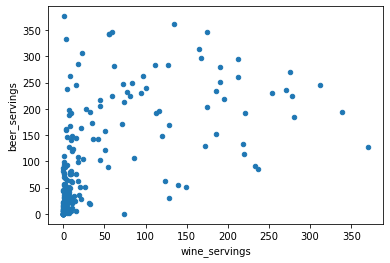

In [78]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.plot(x = 'wine_servings', y = 'beer_servings', kind='scatter')

In [68]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Want to create interactive plots using pandas
0.25?
1. Pick one:
pip install hvplot
conda install -c conda-forge hvplot
2. pd.options.plotting.backend = 'hvplot'
3. df.plot(...)

In [79]:
pd.options.plotting.backend = 'hvplot'

In [161]:
drinks.plot(kind = 'scatter', x='spirit_servings', y='beer_servings', c='continent')


:Scatter   [spirit_servings]   (beer_servings,continent)

Goal: Rearrange the columns in your DataFrame

Steps:
1. Specify all column names in desired order
2. Specify columns to move, followed by remaining columns
3. Specify column positions in desired order

In [162]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [100]:
#specify all column names in desired order using column position
cols = drinks.columns[[0,5,4,3,2,1]]
drinks_arrange = drinks[cols]
drinks_arrange.head(3)

,country,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings
0,Afghanistan,Asia,0.0,0,0,0
1,Albania,Europe,4.9,54,132,89
2,Algeria,Africa,0.7,14,0,25


In [107]:
cols1 = ['continent','beer_servings']
drinks[cols1].head(3)

,continent,beer_servings
0,Asia,0
1,Europe,89
2,Africa,25


In [106]:
#Alternatively:
cols3 = ['wine_servings', 'beer_servings']
new_cols = cols3 + [col for col in drinks if col not in cols3]
drinks[new_cols].head(3)

,wine_servings,beer_servings,country,spirit_servings,total_litres_of_pure_alcohol,continent
0,0,0,Afghanistan,0,0.0,Asia
1,54,89,Albania,132,4.9,Europe
2,14,25,Algeria,0,0.7,Africa


In [111]:
gb = drinks.groupby('continent')

In [113]:
gb.get_group('Africa').head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa


In [125]:
drinks.loc[(drinks['continent']=='Africa') & (drinks['beer_servings']>50)].head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
4,Angola,217,57,45,5.9,Africa
22,Botswana,173,35,35,5.4,Africa
27,Burundi,88,0,0,6.3,Africa


In [131]:
gb2 = drinks.groupby('country')
gb2.get_group('Nigeria')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
124,Nigeria,42,5,2,9.1,Africa


In [132]:
pd.__version__

'1.0.3'

In [133]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.3
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.1.3.post20200330
Cython           : 0.29.15
pytest           : 5.4.1
hypothesis       : 5.5.4
sphinx           : 2.4.4
blosc            : None
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : 4

In [88]:
#Use Numpy without importing it
DF = pd.DataFrame(np.random.rand(5,3), columns = ['A', 'B', 'C'])
DF

,A,B,C
0,0.572091,0.759143,0.567709
1,0.260382,0.340491,0.835404
2,0.196667,0.167370,0.613502
3,0.878314,0.370937,0.800102
4,0.528657,0.865223,0.511317


In [89]:
DF.index.name = 'Rank'

In [90]:
DF

,A,B,C
Rank,,,
0,0.572091,0.759143,0.567709
1,0.260382,0.340491,0.835404
2,0.196667,0.167370,0.613502
3,0.878314,0.370937,0.800102
4,0.528657,0.865223,0.511317


In [91]:
DF['Country'] = ['Nigeria', 'US', 'Ni', 'US', 'Korea']
DF

,A,B,C,Country
Rank,,,,
0,0.572091,0.759143,0.567709,Nigeria
1,0.260382,0.340491,0.835404,US
2,0.196667,0.167370,0.613502,Nigeria
3,0.878314,0.370937,0.800102,US
4,0.528657,0.865223,0.511317,Korea


In [92]:
ct = DF.groupby('Country')
ct.get_group('Nigeria')
DF.style.hide_index()

A,B,C,Country
0.572091,0.759143,0.567709,Nigeria
0.260382,0.340491,0.835404,US
0.196667,0.167370,0.613502,Nigeria
0.878314,0.370937,0.800102,US
0.528657,0.865223,0.511317,Korea


#####This is the end of tip and tricks for this Notebook.

Bye!!!!!!!!!!!!!!!

In [94]:
DF

,A,B,C,Country
Rank,,,,
0,0.572091,0.759143,0.567709,Nigeria
1,0.260382,0.340491,0.835404,US
2,0.196667,0.167370,0.613502,Nigeria
3,0.878314,0.370937,0.800102,US
4,0.528657,0.865223,0.511317,Korea


In [17]:
import pandas as pd
df = pd.DataFrame({'Hobbies': ['I love travelling', 
                          'I love watching football', 
                          'Basketball! That is my favourite sport']})
df

,Hobbies
0,I love travelling
1,I love watching football
2,Basketball! That is my favourite sport


In [19]:
df['word_count'] = df.Hobbies.str.count(' ') + 1
df

,Hobbies,word_count
0,I love travelling,3
1,I love watching football,4
2,Basketball! That is my favourite sport,6
